# SEGUNDA ENTREGA ANALITICA
Natalia Guzman -
Susana Barrientos -
Favio Gónzalez -
Javier Burgos

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


%matplotlib inline

### Dataset 0 (Opcion 1)
Fuente: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [2]:
df_0= pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_2da_entrega/main/marketing_campaign.csv", sep=";")
df_0.head(5)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Dataset 1 FIFA
Fuente: https://sports-statistics.com/sports-data/fifa-2022-dataset-csvs/

In [36]:
df_1 = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_2da_entrega/main/FIFA_22.csv", sep=";", encoding="ISO-8859-1")
df_1.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


### Dataset 3
Fuente: https://www.kaggle.com/datasets/mohamedyosef101/global-energy-substitution-from-1983-to-2022

In [35]:
df_3 = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_2da_entrega/main/global-energy-substitution.csv", sep=",")
df_3.head(5)

,Year,Other_renewables,Biofuels,Solar,Wind,Hydropower,Nuclear,Gas,Oil,Coal,Traditional_biomass
0,1983,211.77058,49.019240,0.008871,0.096974,5552.5425,2933.4590,14703.833,32956.613,22046.346,10321
1,1984,236.32065,57.806423,0.018662,0.132342,5740.6200,3559.8567,15902.680,33680.130,23001.078,10430
2,1985,243.15495,68.410090,0.034737,0.189898,5852.6050,4224.8374,16262.222,33667.098,23987.826,10541
3,1986,263.68542,84.202990,0.044898,0.410523,5931.9126,4525.0864,16421.110,34712.902,24258.035,10653
4,1987,282.44330,85.330120,0.031353,0.577727,6012.1157,4922.3310,17281.895,35404.360,25212.426,10765


In [37]:
#Información general de las variables
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(18), int64(44), object(48)
memory usage: 16.1+ MB


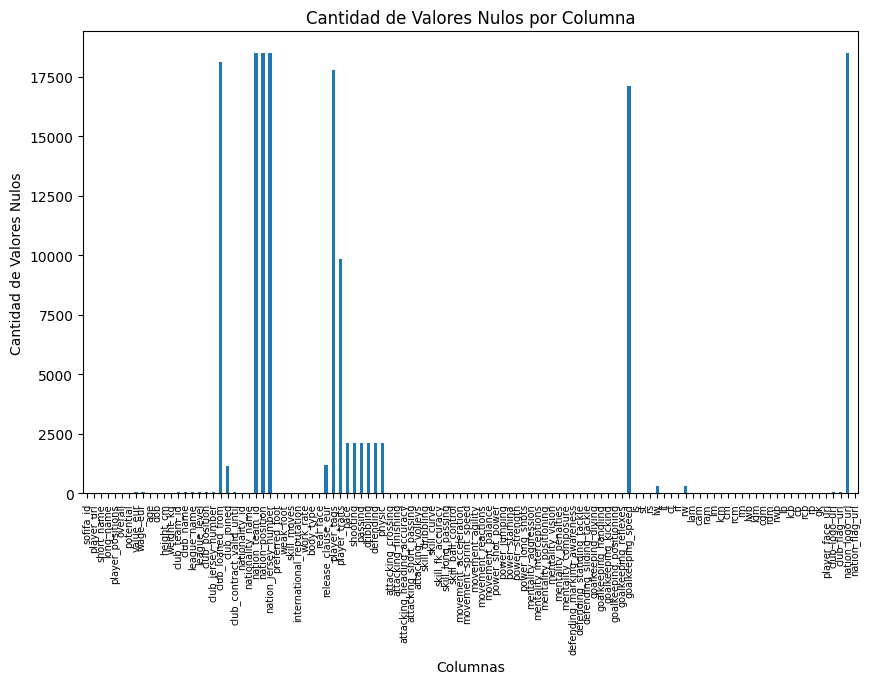

In [38]:
# Nulos
null_counts = df_1.isnull().sum()

# Crea la gráfica de barras
plt.figure(figsize=(10, 6))
ax = null_counts.plot(kind='bar')
ax.set_title('Cantidad de Valores Nulos por Columna')
ax.set_xlabel('Columnas')
ax.set_ylabel('Cantidad de Valores Nulos')

# Ajusta el tamaño de las fuentes en el eje x
ax.tick_params(axis='x', labelsize=7)  # Puedes ajustar el valor de labelsize según tus preferencias

plt.show()

In [39]:
#Identificación de variables con mas de un 80% de valores nulos
df_1[df_1.columns[df_1.isnull().any()]].isnull().sum() * 100 / df_1.shape[0]

value_eur                     0.384635
wage_eur                      0.317064
club_team_id                  0.317064
club_name                     0.317064
league_name                   0.317064
league_level                  0.317064
club_position                 0.317064
club_jersey_number            0.317064
club_loaned_from             94.272052
club_joined                   6.045013
club_contract_valid_until     0.317064
nation_team_id               96.054889
nation_position              96.054889
nation_jersey_number         96.054889
release_clause_eur            6.112584
player_tags                  92.510006
player_traits                51.151307
pace                         11.081657
shooting                     11.081657
passing                      11.081657
dribbling                    11.081657
defending                    11.081657
physic                       11.081657
goalkeeping_speed            88.918343
lw                            1.694475
rw                       

In [40]:
#Eliminación de variables con mas de un 80% de valores nulos
df_1 = df_1.drop(columns = ['nation_logo_url','player_tags','player_traits',
                        'nation_jersey_number','nation_position','nation_team_id','club_loaned_from',
                       'goalkeeping_speed'])

In [41]:
#Eliminacion de variables que no aportan al modelo

df_1 = df_1.drop(columns = ['player_url','long_name','club_position','nationality_id','player_face_url',
                        'club_logo_url','club_flag_url','nation_flag_url','body_type', 'real_face'])

In [46]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
sofifa_id,19239.0,2.314681e+05,2.703972e+04,41.0,214413.5,236543.0,253532.5,264640.0
overall,19239.0,6.577218e+01,6.880232e+00,47.0,61.0,66.0,70.0,93.0
potential,19239.0,7.107937e+01,6.086213e+00,49.0,67.0,71.0,75.0,95.0
value_eur,19165.0,2.850452e+06,7.613700e+06,9000.0,475000.0,975000.0,2000000.0,194000000.0
wage_eur,19178.0,9.017989e+03,1.947018e+04,500.0,1000.0,3000.0,8000.0,350000.0
age,19239.0,2.521082e+01,4.748235e+00,16.0,21.0,25.0,29.0,54.0
height_cm,19239.0,1.812997e+02,6.863179e+00,155.0,176.0,181.0,186.0,206.0
weight_kg,19239.0,7.494303e+01,7.069434e+00,49.0,70.0,75.0,80.0,110.0
club_team_id,19178.0,5.058050e+04,5.440187e+04,1.0,479.0,1938.0,111139.0,115820.0
league_level,19178.0,1.354364e+00,7.478651e-01,1.0,1.0,1.0,1.0,5.0


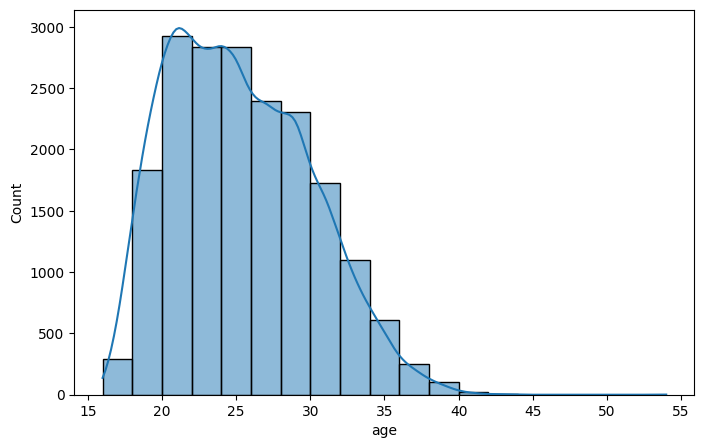

In [43]:
#Cual es el comportamiento de la edad de los jugadores?
plt.figure(figsize = (8,5))
sns.histplot(data = df_1, x = 'age',bins = 10, kde = True, binwidth = 2);

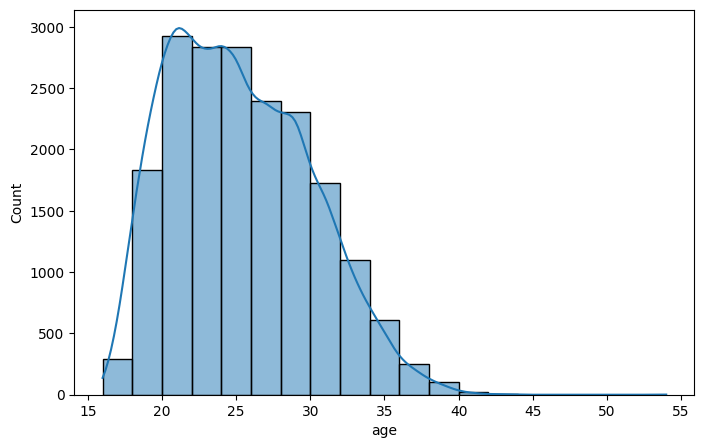

In [44]:
#Cual es el comportamiento del puntaje de los jugadores?
plt.figure(figsize = (8,5))
sns.histplot(data = df_1, x = 'age',bins = 10, kde = True, binwidth = 2);

In [48]:
#Posiciones por jugador
df_1.player_positions.head()

0    RW, ST, CF
1            ST
2        ST, LW
3       LW, CAM
4       CM, CAM
Name: player_positions, dtype: object

In [50]:
#Dejar solo una posicion para reducir la informacion 
df_1[['Posicion','posicion2','posicion3']] = df_1.player_positions.str.split(pat = ',', expand = True)
df_1 = df_1.drop(columns = ['player_positions','posicion2','posicion3'])
df_1.Posicion.head()

0    RW
1    ST
2    ST
3    LW
4    CM
Name: Posicion, dtype: object

In [52]:
#Jugadores con mejor puntaje
Mejores_jugadores_por_posicion = df_1.loc[df_1.groupby(df_1['Posicion'])['overall'].idxmax()][['Posicion',
                                                                                     'short_name','overall']]
Mejores_jugadores_por_posicion

,Posicion,short_name,overall
28,CAM,Bruno Fernandes,88
15,CB,V. van Dijk,89
10,CDM,N. Kanté,90
11,CF,K. Benzema,89
4,CM,K. De Bruyne,91
5,GK,J. Oblak,91
42,LB,A. Robertson,87
13,LM,H. Son,89
3,LW,Neymar Jr,91
165,LWB,L. Spinazzola,83


In [55]:
#Cuantos jugadores hay por cada posicion?
pd.DataFrame(df_1.Posicion.value_counts()).T

Posicion,CB,ST,CM,GK,CDM,LB,RB,CAM,RM,LM,RW,LW,RWB,LWB,CF
count,3339,2608,2173,2132,1665,1360,1346,1151,1028,1016,495,435,178,171,142


In [60]:
#Clubes con mejor promedio de puntaje global - Overall
club_avg_overall = df_1.groupby('club_name')['overall'].mean().reset_index().sort_values('overall',ascending = False)
club_avg_overall.head().T

,371,473,361,244,415
club_name,Juventus,Paris Saint-Germain,Inter,FC Bayern München,Manchester United
overall,79.961538,79.454545,78.857143,78.071429,78.0


In [61]:
#Decision: Dejar jugadores con Overall superior a 70 para reducir la base de datos
n = 10000

df_n = df_1.iloc[:n]
df_n = df_n[(df_n['overall']>70)]

# Aqui abajo creamos una variable llamada Posicion2, donde resuma las posiciones de los jugadores
# en tan solo 4 posiciones
Delantero = ['RF','ST','LW','LF','RS','LS','RM','LM','RW']
Mediocampista = ['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
Defensor = ['RCB','CB','LCB','LB','RB','RWB','LWB']
Arquero = ['GK']

def pos2(posicion):
    if posicion in Delantero:
        return 'Delantero'
    elif posicion in Mediocampista:
        return 'Mediocampista'
    elif posicion in Defensor:
        return 'Defensor'
    elif posicion in Arquero:
        return 'Arquero'
    
    else:
        return 'nan'
    
df_n['Posicion2'] = df_n['Posicion'].apply(lambda x: pos2(x))

In [62]:
# Creamos un objeto con todas las skills
skills_ra = [ 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

# Skills de arquero:
skills_gk = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes','Posicion2']

# Skills de defensor:
skills_def = [ 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle','Posicion2']
# Skills de atacantes:
skills_at = ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing', 'Posicion2']

# Skills de mediocampo:
skills_mid = ['skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'Posicion2']

# Skills de Movimiento y balance
skills_movement = ['movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'Posicion2']
# Skills de Fuerza
skills_power = ['power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'Posicion2']

# Skills Mentales
skills_mental = ['mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'Posicion2']


print(len(skills_ra), 'Variables numericas de desempeño segun habilidades')

40 Variables numericas de desempeño segun habilidades


In [64]:
posiciones=df_n.loc[:, 'Posicion2']

In [65]:
posiciones.value_counts()

Posicion2
Defensor         1485
Delantero        1332
Mediocampista    1332
Arquero           444
Name: count, dtype: int64

In [76]:
#Revisar nulos 
null_counts = df_n.isnull().sum()
null_columns = null_counts[null_counts > 0]  # Filtrar las columnas con valores nulos

# Mostrar solo las columnas con valores nulos
print(null_columns)

Series([], dtype: int64)


In [73]:
columns_to_fill = ['value_eur', 'wage_eur', 'club_team_id', 'club_jersey_number', 'release_clause_eur', 
                   'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'lw', 'rw']

# Calcular la mediana de las columnas seleccionadas
medians = df_n[columns_to_fill].median()

# Reemplazar los valores nulos en las columnas seleccionadas con la mediana
df_n[columns_to_fill] = df_n[columns_to_fill].fillna(medians)

In [75]:
columns_to_fill = ['club_name', 'league_name', 'league_level', 'club_joined', 'club_contract_valid_until']

for column in columns_to_fill:
    mode_value = df_n[column].mode()[0]  # Calcula la moda de la columna
    df_n[column].fillna(mode_value, inplace=True)  # Reemplaza los valores nulos con la moda

# Verifica que los valores nulos se hayan reemplazado correctamente
df_n.isnull().sum()

sofifa_id     0
short_name    0
overall       0
potential     0
value_eur     0
             ..
rcb           0
rb            0
gk            0
Posicion      0
Posicion2     0
Length: 93, dtype: int64

In [78]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4593 entries, 0 to 4592
Data columns (total 93 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    4593 non-null   int64  
 1   short_name                   4593 non-null   object 
 2   overall                      4593 non-null   int64  
 3   potential                    4593 non-null   int64  
 4   value_eur                    4593 non-null   float64
 5   wage_eur                     4593 non-null   float64
 6   age                          4593 non-null   int64  
 7   dob                          4593 non-null   object 
 8   height_cm                    4593 non-null   int64  
 9   weight_kg                    4593 non-null   int64  
 10  club_team_id                 4593 non-null   float64
 11  club_name                    4593 non-null   object 
 12  league_name                  4593 non-null   object 
 13  league_level           

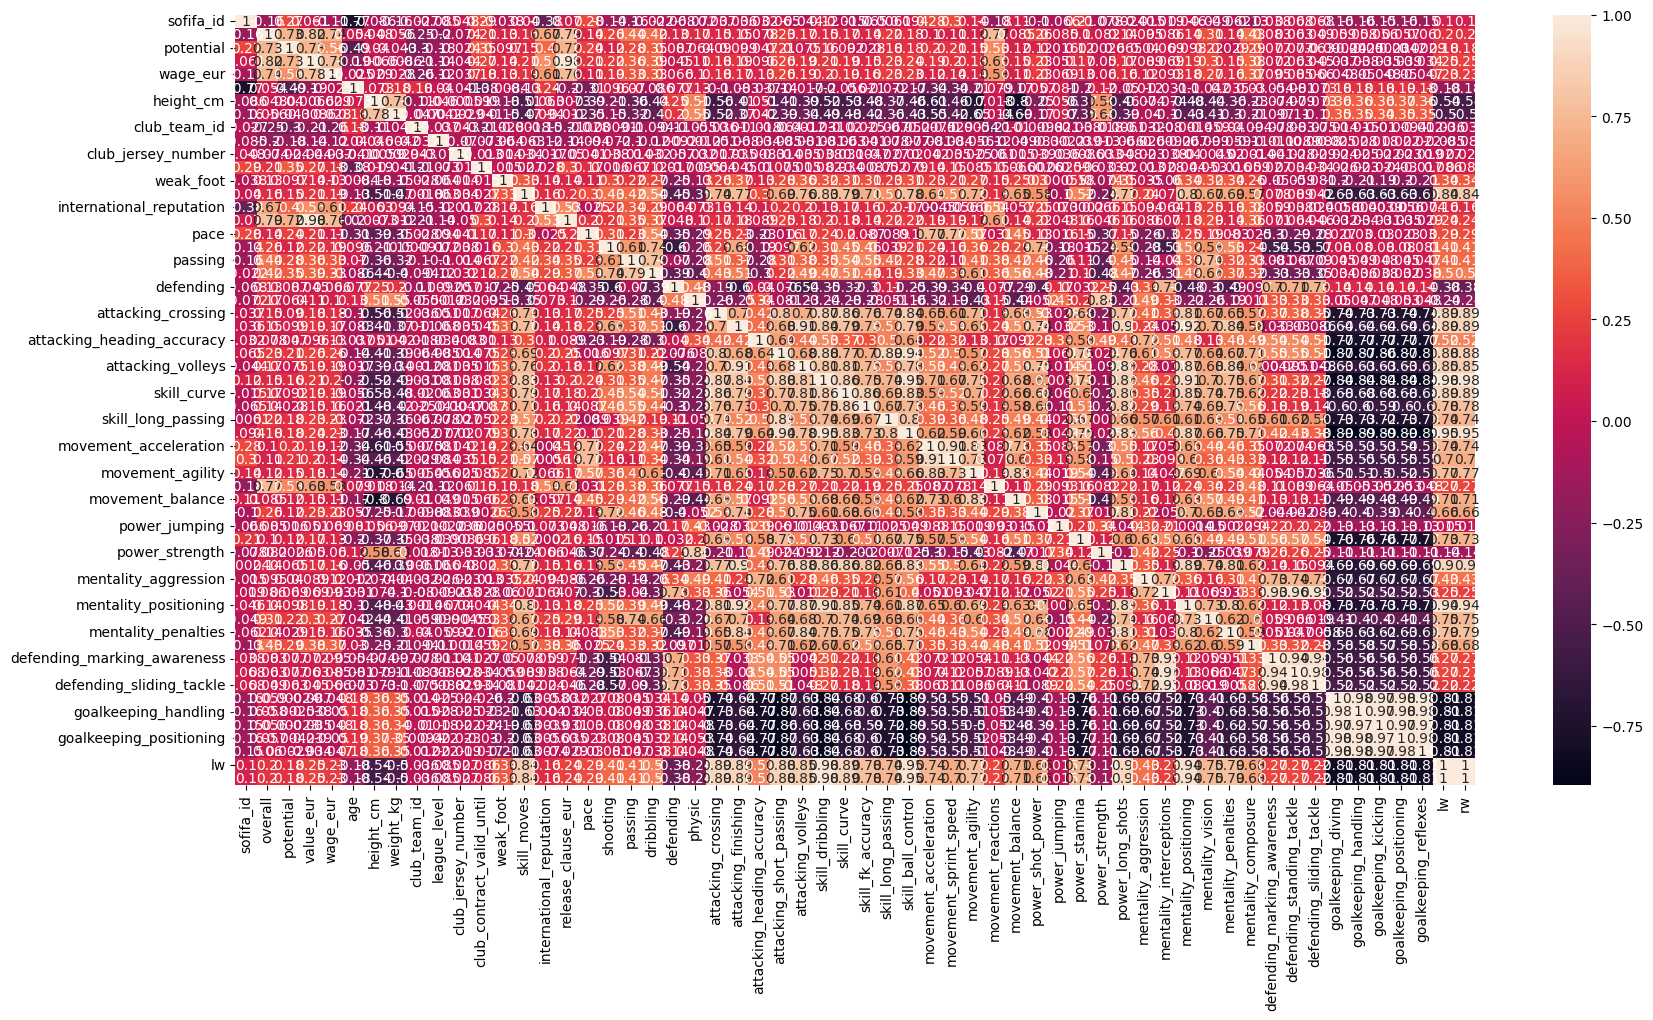

In [80]:
# Matriz de correlación
# Seleccionar solo las columnas numéricas
df_numeric = df_n.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()